In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>✌ ¡Hola a tod@s! ✌ </b></marquee><center>

<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Clasificación </p> Conceptos KNN </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>




# <FONT SIZE=5 COLOR="purple"> 1. Ejemplo Práctico con Datos: diabetes</FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 1.1 Librerías de trabajo </FONT>

In [20]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar modelos
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics           import specificity_score
# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 1.2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada una de las pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 1.3 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [21]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"
diabetes= pd.read_csv(url)

In [22]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# cambiar el nombre de Outcome por resultado
diabetes.rename(columns={"Outcome":"resultado"}, inplace=True)

In [24]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <FONT SIZE=4 COLOR="blue">  1.4 Alistamiento para el modelo</FONT>

En este paso vamos a definir

- Variable objetivo

- Variables predictoras

- Conjunto de entrenamiento y de prueba

- Escalar los datos

In [25]:
# la variable objetivo
y = diabetes["resultado"]
# las variables predictoras
X = diabetes.drop("resultado", axis=1)
# Dividir en dos conjuntos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)


## <FONT SIZE=4 COLOR="blue">  1.5 Modelo KNN</FONT>

Vamos a aplicar el modelo KNN.

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*.

Para generar el modelo tenemos múltiples alternativas, ya que podemos seleccionar:

   - **k** : número de vecinos. Por defecto $k=5$
   - La **métrica** : *minkowski* , *manhattan* , *euclidean*, etc.
   - Los pesos **weights**: *uniform* y *distance*. Por defecto *uniform*

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [29]:
# definir el modelo
KNN = KNeighborsClassifier(n_neighbors = 10,         # número de vecinos k=10
                           metric = 'euclidean',     # métrica euclideana
                           weights= "uniform")       # peso que se asigna a los datos
# entrenamos el modelo
KNN.fit(X_train_s,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

## <FONT SIZE=4 COLOR="blue">  1.6 Evaluar el modelo KNN (test)</FONT>

In [31]:
y_pred = KNN.predict(X_test_s)

In [32]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [36]:
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [38]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  15],
       [ 41,  33]])

Una versión más elaborada de la matriz de confusión.

Text(0.5, 23.52222222222222, 'Predicciones')

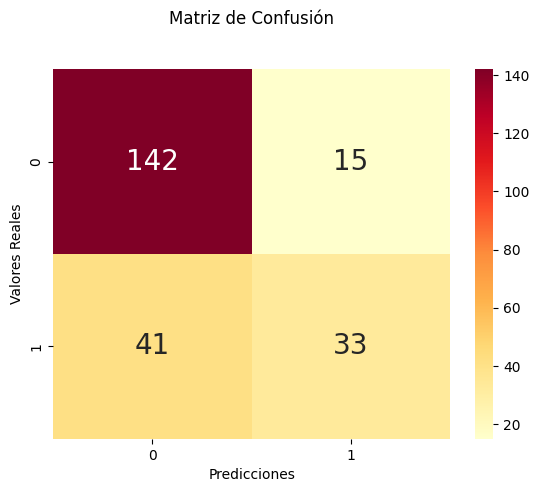

In [39]:
# valores de predicción
y_pred = KNN.predict(X_test_s)
# matriz de confusión
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

Vamos a calcular las métricas mencionadas anteriormente:

In [40]:
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall", "specificity" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.757576
1,recall,0.445946
2,specificity,0.904459
3,precision,0.687500
4,f1,0.540984


| Métrica   | ¿Por qué es importante en detección de diabetes? |
|---------- |---------|
| Recall       | Es clave porque queremos detectar todos los pacientes con diabetes y minimizar los falsos negativos (FN). <br> Un FN significaría que un paciente enfermo no recibe tratamiento a tiempo.  |
| F1-Score    | Si hay un desbalance en los datos (pocos casos positivos), ayuda a equilibrar precisión y recall.<br> Evita que un modelo con alta precisión pero bajo recall o viceversa sea engañoso.   |
| Precision    | Es importante, pero no tan prioritaria como el recall. <br>Un alto recall puede generar algunos falsos positivos (FP), pero es preferible hacer más pruebas a pacientes <br> falsamente etiquetados con diabetes que dejar enfermos sin diagnóstico.   |
| Especificidad    | Puede ser útil, pero no es la métrica principal. <br>Si la especificidad es demasiado alta, podría significar que el modelo no detecta suficientes casos de diabetes.   |

Otra forma de revisar las métricas es con el *classification_report*

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.69      0.45      0.54        74

    accuracy                           0.76       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.75      0.76      0.74       231



**Conclusiones**:

- El modelo está clasificando bien al $76\%$ de los registros. No es un valor muy alto.

- El *recall* es $0.45$, es decir, de las personas que tienen diabetes, el algoritmo detecta correctamente un $45\%$. El algoritmo no es tan bueno detectando personas con diabetes en los que sí tienen la enfermedad.

- Se recomienda, tratar de optimizar los hiperparámetros o utilizar otro modelo.

## <FONT SIZE=4 COLOR="blue">  1.6 Predicción nueva con el modelo </FONT>



Aunque el rendimiento del modelo no es el mejor, vamos a mostrar como se haría una predicción de un valor nuevo.

Particularmente, en estos algoritmos en los que se debe escalar, se deben escalar los valores a predecir. Este escalamiento se hace con base a $X_{train}$.

Supongamos que queremos predecir si una paciente es propensa a tener diabetes o no, con los siguientes valores:

- ***Pregnancies*** : 6
- ***Glucose*** : 147
- ***BloodPressure*** : 70
- ***SkinThikness*** : 35
- ***Insulin*** : 80
- ***BMI*** : 33.6
- ***DiabetesPedigreeFunction*** : 0.627
- ***Age*** : 50

In [ ]:
# representamos en forma de lista
[6,	147,	70,	35,	80,	33.6,	0.627, 50]

In [44]:
# usamos la función escalar.transform
X_new = np.array([[6,	147,	70,	35,	80,	33.6,	0.627, 50]])
X_test1 = escalar.transform(X_new)
X_test1

array([[ 0.63060337,  0.79026263,  0.01714088,  0.87217022, -0.04136448,
         0.16754413,  0.46596991,  1.36167568]])

In [45]:
KNN.predict(X_test1)

array([1])

# <FONT SIZE=5 COLOR="purple"> 2. Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba. Luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionadas. Sin embargo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

In [58]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), KNN)
resultados = cross_val_score(pipeline,                     # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = 5,                      # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

[0.73376623 0.74025974 0.71428571 0.76470588 0.73202614]


np.float64(0.7370087428910959)

Obtenemos en promedio 0.74 de *Accuracy*

# <FONT SIZE=5 COLOR="purple"> 8. Parámetro vs Hiperparámetro </FONT>

Iniciaremos definiendo los siguientes conceptos:

**Parámetros**:

- Son variables propias del modelo y que se obtienen de forma automática usando el conjunto de entrenamiento. Es decir, se estiman a partir de los datos.  

- Por ejemplo, en regresión lineal buscamos una ecuación de la forma $y= \beta_1 x +\beta_0$ y precisamente este tipo de modelo nos ayuda a encontrar estos valores de $\beta_1$ y $\beta_0$.

***Hiperparámetros:***

- Son parámetros de aprendizaje automático que se eligen antes de iniciar el proceso de aprendizaje automático.

- Son variables externas al modelo que no se obtienen automáticamente a partir de los datos.

- Son ajustables y pueden afectar directamente a la forma en la que se entrena un modelo de aprendizaje automático.

Algunos de estos hiperparámetros son:

- *Número de vecinos en knn*

- *Número de épocas en redes neuronales*

- *Número de ramas en un árbol de decisión*

- *Número de clústeres en un algoritmo de agrupamiento*

- *Tipo de kernel en SVM*

Los hiperparámetros son flexibles, ya que se refieren a cualquier elemento en el machine learning y el deep learning que decida sus valores o elija su configuración antes de que comience el entrenamiento y cuyos valores permanecen iguales cuando se finaliza el entrenamiento.

Los parámetros, por su lado, son características inherentes al modelo. Esto quiere decir que se aprenden o se estiman a partir de los datos brindados durante el entrenamiento, ya que el algoritmo que se use intentará aprender a partir de las características de entrada y la variable objetivo.

**Hiperparámetros de KNN**

Particularmente en el algoritmo de ***knn***, k-vecinos más cercanos tenemos los siguientes hiperpámetros.

- El ***número de vecinos*** $k$.

- Las ***métricas***. Las más clásicas se pueden seleccionar entre:

   - Euclideana
   - Manhattan
   - Minkowski

- Los ***pesos*** en las métricas.

   - Uniformes
   - Respecto a la distancia.  

Podemos ver la documentación para ampliar la información

[ALGORITMO KNN-sklearn 🌎](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


# <FONT SIZE=5 COLOR="purple"> 9. Búsqueda en Grilla </FONT>

- La ***búsqueda en grilla*** (grid search) es un método que busca las mejores combinaciones de hiperparámetros que hacen que un modelo tenga el error más bajo, es decir, estimaciones más precisas.

- En cada combinación de hiperparámetros, la búsqueda en grilla aplica el proceso de *cross-validation* con el fin de dar una mejor evaluación del modelo en cada punto.

- Cuando hablamos de búsqueda en grilla tenemos algunas alternativas: Grid Search y Random Grid Search. La primera se denomina propiamente *Grid Search* y en este método, se toman todas las combinaciones posibles de los hiperparámetros que se van a revisar. Como se ilustra en la siguiente gráfica.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid1.png?raw=true?" alt="centered image" width="600" height="350"></center>
<br>

Para hacer la búsqueda en grilla, vamos a considerar los siguientes parámetros

1. El número de vecinos $k$ : [1,20]
2. Las métricas : *euclideana* y *manhattan*
3. Los pesos: "uniformes" o basados en "distancia"

De acuerdo con lo anterior tenemos

$$(20 \, vecinos) \times ( 2 \, metricas) \times ( 2 \, pesos) = 80$$

combinaciones de parámetros.

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Crear pipeline con escalador y modelo
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Definir los hiperparámetros del paso 'knn'
grid_params = {
    "knn__n_neighbors": list(range(1, 21)),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

# Grid search con validación cruzada
grid_search = GridSearchCV(pipe,
                           grid_params,
                           cv=10,
                           verbose=1)   # mostrar o no resultados

# Entrenamiento sin data leakage
g_res=grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


Ahora, buscamos el mejor *score*

In [65]:
print("Mejor score: ",g_res.best_score_)

Mejor score:  0.7541229909154437


Finalmente, los hiperparámetros que lograron ese *score*

In [66]:
print("Mejores hiperparámetros", g_res.best_params_)

Mejores hiperparámetros {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'distance'}
